<a href="https://colab.research.google.com/github/NeilSharma425/simple_AI_Projects/blob/main/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
import os
os.chdir("/content/drive/MyDrive/ScoutOut/datasets/")

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Year               10000 non-null  int64  
 2   Locality           8745 non-null   object 
 3   Estimated Value    8771 non-null   float64
 4   Sale Price         10000 non-null  float64
 5   Property           10000 non-null  object 
 6   Residential        10000 non-null  object 
 7   num_rooms          10000 non-null  int64  
 8   num_bathrooms      10000 non-null  int64  
 9   carpet_area        8718 non-null   float64
 10  property_tax_rate  10000 non-null  float64
 11  Face               10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB
None

Descriptive Stats:
               Year  Estimated Value    Sale Price     num_rooms  \
count  10000.000000     8.771000e+03  1.000000e+04  

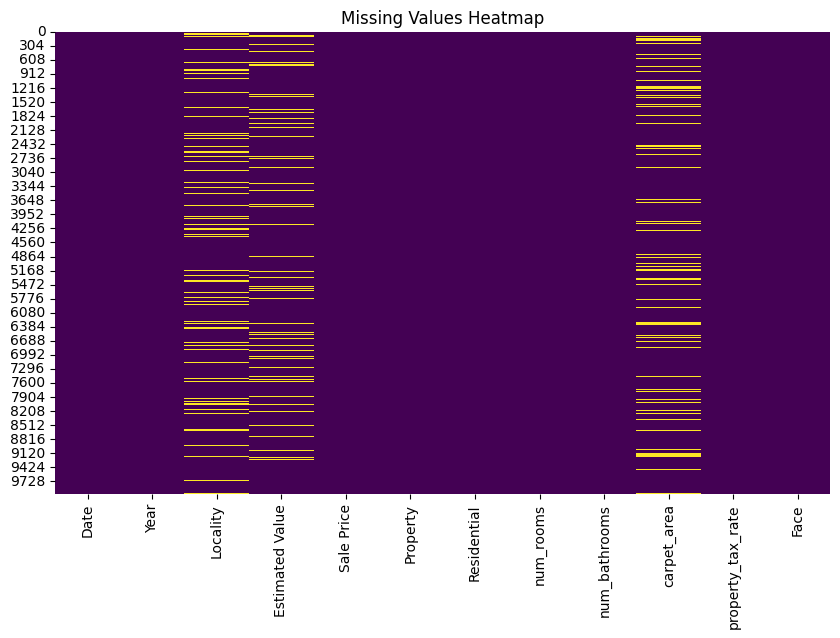

In [220]:
df = pd.read_csv('Kaggle.csv')

# Initial exploration
print("Data Info:")
print(df.info())
print("\nDescriptive Stats:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Year               10000 non-null  int64  
 2   Locality           8745 non-null   object 
 3   Estimated Value    8771 non-null   float64
 4   Sale Price         10000 non-null  float64
 5   Property           10000 non-null  object 
 6   Residential        10000 non-null  object 
 7   num_rooms          10000 non-null  int64  
 8   num_bathrooms      10000 non-null  int64  
 9   carpet_area        8718 non-null   float64
 10  property_tax_rate  10000 non-null  float64
 11  Face               10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB


In [222]:

# Handle missing values more robustly
df['Locality'] = df['Locality'].fillna('Unknown')

# Verify and clean extreme values in numerical columns
num_cols = ['Estimated Value', 'Sale Price', 'carpet_area']
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Cap extreme values
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
df.describe()

,Year,Estimated Value,Sale Price,num_rooms,num_bathrooms,carpet_area,property_tax_rate
count,10000.000000,8771.000000,1.000000e+04,10000.000000,10000.000000,8718.000000,10000.000000
mean,2015.880100,332383.380173,4.652429e+05,3.329600,2.334000,1044.170223,1.143517
std,4.088031,263211.329916,3.973991e+05,0.885123,1.209293,111.664766,0.166762
min,2009.000000,0.000000,2.000000e+03,3.000000,1.000000,900.000000,1.003979
25%,2012.000000,130525.000000,1.600000e+05,3.000000,1.000000,960.000000,1.023495
50%,2016.000000,243180.000000,3.400000e+05,3.000000,2.000000,1021.000000,1.025899
75%,2019.000000,441830.000000,6.300000e+05,3.000000,3.000000,1082.000000,1.348259
max,2022.000000,908787.500000,1.335000e+06,8.000000,8.000000,1265.000000,1.422308


In [223]:
print(df['Property'].value_counts(dropna=False))
print(df['Residential'].value_counts(dropna=False))
print(df['Face'].value_counts(dropna=False))

Property
Single Family    6797
?                1788
Two Family        851
Three Family      480
Four Family        84
Name: count, dtype: int64
Residential
Detached House    8296
Duplex            1014
Triplex            584
Fourplex           106
Name: count, dtype: int64
Face
North    2535
East     2514
South    2481
West     2470
Name: count, dtype: int64


In [224]:
# Display count and percentage of missing values per column
missing_summary = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': df.isnull().mean() * 100
})
print(missing_summary)


                   missing_count  missing_percent
Date                           0             0.00
Year                           0             0.00
Locality                       0             0.00
Estimated Value             1229            12.29
Sale Price                     0             0.00
Property                       0             0.00
Residential                    0             0.00
num_rooms                      0             0.00
num_bathrooms                  0             0.00
carpet_area                 1282            12.82
property_tax_rate              0             0.00
Face                           0             0.00


In [225]:
print("Columns in your DataFrame:", df.columns.tolist())
print("Does 'Estimated Value' exist?", 'Estimated Value' in df.columns)
print("Does 'Estimated_value' exist?", 'Estimated_value' in df.columns)

Columns in your DataFrame: ['Date', 'Year', 'Locality', 'Estimated Value', 'Sale Price', 'Property', 'Residential', 'num_rooms', 'num_bathrooms', 'carpet_area', 'property_tax_rate', 'Face']
Does 'Estimated Value' exist? True
Does 'Estimated_value' exist? False


In [226]:
# Clean and preprocess core columns
df = (df
    .assign(
        Property=lambda x: x['Property'].replace('?', 'Unknown').str.strip(),
        Locality=lambda x: x['Locality'].replace('?', 'Unknown').str.strip(),
        carpet_area=lambda x: x['carpet_area'].replace(0, np.nan),
        Date=lambda x: pd.to_datetime(x['Date'])
    )
)

In [227]:
# Core features
df['Estimated_Value'] = df['Estimated Value'].fillna(df['Sale Price'] * 0.8)
df['Price_Ratio'] = df['Sale Price'] / df['Estimated_Value']
df['High_Potential'] = (df['Price_Ratio'] > df['Price_Ratio'].quantile(0.75)).astype(int)

# Impute missing carpet areas
df['carpet_area'] = df.groupby('num_rooms')['carpet_area'].transform(lambda x: x.fillna(x.median()))

# Core space metrics
df['price_per_sqft'] = df['Sale Price'] / df['carpet_area']
df['room_bath_ratio'] = df['num_rooms'] / df['num_bathrooms']
df['size_per_room'] = df['carpet_area'] / df['num_rooms']
df['age'] = df['Year'].max() - df['Year']

# Enhanced features
df['tax_impact'] = np.log1p(df['property_tax_rate'])
df['tax_tier'] = pd.cut(df['property_tax_rate'],
                       bins=[1.0, 1.1, 1.3, 1.43],
                       labels=['low', 'medium', 'high'])
df['space_quality'] = df['size_per_room'] * (1 - 0.1*df['age']/10)
df['overcrowded'] = (df['num_rooms'] > 4).astype(int)
df['luxury_size'] = (df['size_per_room'] > 300).astype(int)
df['locality_boost'] = df['Locality'].map(df['Locality'].value_counts(normalize=True)) * df['carpet_area']

# Time features (kept but marked for potential removal)
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.quarter

In [228]:
# Outlier capping
def cap_outliers(series):
    return series.clip(*series.quantile([0.05, 0.95]))

num_cols = ['Estimated_Value', 'Sale Price', 'carpet_area', 'price_per_sqft', 'room_bath_ratio']
df[num_cols] = df[num_cols].apply(cap_outliers)

# Verification
print("Estimated_Value stats:")
print(f"Min: {df['Estimated_Value'].min():,.0f}")
print(f"Max: {df['Estimated_Value'].max():,.0f}")
print(f"Null values: {df['Estimated_Value'].isnull().sum()}\n")
print("Missing values after preprocessing:")
print(df.isnull().sum())

Estimated_Value stats:
Min: 64,848
Max: 908,788
Null values: 0

Missing values after preprocessing:
Date                    0
Year                    0
Locality                0
Estimated Value      1229
Sale Price              0
Property                0
Residential             0
num_rooms               0
num_bathrooms           0
carpet_area             0
property_tax_rate       0
Face                    0
Estimated_Value         0
Price_Ratio             0
High_Potential          0
price_per_sqft          0
room_bath_ratio         0
size_per_room           0
age                     0
tax_impact              0
tax_tier                0
space_quality           0
overcrowded             0
luxury_size             0
locality_boost          0
month                   0
quarter                 0
dtype: int64


In [229]:
df

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,...,size_per_room,age,tax_impact,tax_tier,space_quality,overcrowded,luxury_size,locality_boost,month,quarter
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,...,332.000000,13,0.706040,low,288.840000,0,1,150.1968,1,1
1,2009-01-02,2009,Unknown,73080.0,152000.0,Single Family,Detached House,3,1,935.0,...,311.666667,13,0.706040,low,271.150000,0,1,117.3425,1,1
2,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,...,317.000000,13,0.706040,low,275.790000,0,1,143.4108,1,1
3,2009-01-02,2009,Norwalk,571060.0,1000000.0,Single Family,Detached House,3,2,999.0,...,333.000000,13,0.706040,low,289.710000,0,1,102.5973,1,1
4,2009-01-02,2009,Bridgeport,908787.5,272900.0,Single Family,Detached House,3,1,971.0,...,323.666667,13,0.706040,low,281.590000,0,1,163.8077,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-09-30,2022,Unknown,155550.0,215000.0,Three Family,Triplex,6,5,1265.0,...,210.833333,0,0.695135,low,210.833333,1,0,158.7575,9,3
9996,2022-09-30,2022,Greenwich,NaN,1335000.0,Single Family,Detached House,3,3,933.0,...,311.000000,0,0.695135,low,311.000000,0,1,100.2975,9,3
9997,2022-09-30,2022,West Hartford,124740.0,225635.0,Single Family,Detached House,3,1,922.0,...,307.333333,0,0.695135,low,307.333333,0,1,100.9590,9,3
9998,2022-09-30,2022,Unknown,908787.5,1335000.0,Single Family,Detached House,3,2,977.0,...,325.666667,0,0.695135,low,325.666667,0,1,122.6135,9,3


In [230]:
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare data
df_model = df.copy()

# Frequency encode Locality
df_model['Locality_freq'] = df_model['Locality'].map(df_model['Locality'].value_counts(normalize=True))

# Label encode categoricals
categorical_cols = ['Property', 'Residential', 'Face']
for col in categorical_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col].astype(str))

# Remove leaky/time features
leaky_cols = ['Estimated Value', 'Sale Price', 'Estimated_Value',
              'price_to_tax_ratio', 'estimated_price_ratio',
              'Price_Ratio', 'price_per_sqft']
time_cols = ['Date', 'Year', 'month', 'quarter', 'is_q4']
cols_to_remove = list(set(leaky_cols + time_cols + ['Locality']))
df_model = df_model.drop(columns=[col for col in cols_to_remove if col in df_model.columns])

X = df_model.drop(columns=['High_Potential'])
y = df_model['High_Potential']

In [231]:
# Clean numerical features
for col in X.columns:
    # Only process numeric columns
    if pd.api.types.is_numeric_dtype(X[col]):
        # Calculate robust quantiles first
        q05, q95 = X[col].quantile([0.05, 0.95])

        # Handle inf and outliers
        X[col] = (X[col]
                 .replace([np.inf, -np.inf], np.nan)
                 .clip(lower=q05, upper=q95))

# Fill NA only for numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Leakage check
def check_leakage(X, y, threshold=0.7):
    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
    high_corr = [(col, abs(X[col].corr(y)))
                for col in numeric_cols
                if abs(X[col].corr(y)) > threshold]

    if high_corr:
        print("Potential leakage found:")
        for feat, corr in sorted(high_corr, key=lambda x: x[1], reverse=True):
            print(f"- {feat}: {corr:.3f}")
        return X.drop(columns=[feat for feat, _ in high_corr])
    return X

X = check_leakage(X, y)

In [232]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a pipeline with preprocessor and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Your existing preprocessor
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define your parameter grid
param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_leaf': [5],
    'classifier__max_features': ['sqrt'],
    'classifier__class_weight': ['balanced']
}

# Create GridSearchCV with the pipeline
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=3,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best pipeline
best_pipeline = grid_search.best_estimator_

# Now you can access named_steps
fitted_features = best_pipeline.named_steps['preprocessor'].get_feature_names_out()

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [233]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV

# ===== ENHANCED MODEL TRAINING =====
#param_grid = {
#    'n_estimators': [50, 100, 150],
#    'max_depth': [5, 10, None],
#    'min_samples_leaf': [3, 5, 7],
#    'max_features': [0.3, 'sqrt', 'log2'],
#    'class_weight': [{0: 1, 1: 2}, 'balanced']
#}
#
#grid_search = GridSearchCV(
 #   RandomForestClassifier(random_state=42, n_jobs=-1),
  #  param_grid,
   # cv=5,
    #scoring='roc_auc',
    #verbose=3,
#    error_score='raise'
#).fit(X_train, y_train)
#
#best_rf = grid_search.best_estimator_
#print(f"\nBest validation AUC: {grid_search.best_score_:.4f}")
#print(f"Best params: {grid_search.best_params_}")


Score Distribution:
Score_Group
Low        860
Medium     541
High       306
Premium    293
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1500
           1       0.44      0.61      0.52       500

    accuracy                           0.71      2000
   macro avg       0.65      0.68      0.66      2000
weighted avg       0.75      0.71      0.72      2000

ROC AUC: 0.7638


<Figure size 1000x600 with 0 Axes>

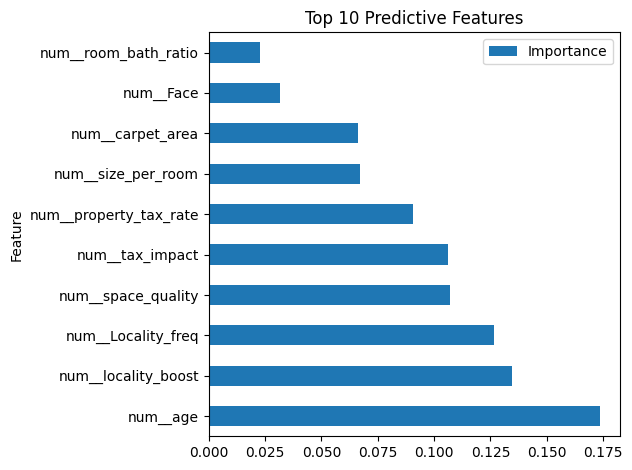

In [234]:
# Get the original feature names that correspond to the transformed features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Generate predictions using the pipeline (no need to manually align features)
y_pred = best_pipeline.predict(X_test)
y_prob = best_pipeline.predict_proba(X_test)[:, 1]

# Get the preprocessed test data for scoring
X_test_processed = pd.DataFrame(
    best_pipeline.named_steps['preprocessor'].transform(X_test),
    columns=best_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

# Convert probabilities to scores (0-100)
def calculate_base_score(prob):
    """Convert probability to 1-100 scale"""
    return np.clip(50 * (1 + np.tanh(4 * (prob - 0.5))), 1, 99)

def apply_business_rules(row):
    """Apply domain-specific adjustments"""
    # Tax adjustments
    tax_adj = -10 if row['tax_tier'] == 'high' else (
              5 if row['tax_tier'] == 'low' else 0)

    # Space quality adjustments
    space_adj = 8 if row['luxury_size'] else (
              -5 if row['overcrowded'] else 0)

    # Location premium
    loc_adj = row['locality_boost'] * 0.05

    return row['Base_Score'] + tax_adj + space_adj + loc_adj

# Calculate scores
scored_data = X_test.assign(
    True_Label=y_test,
    Probability=y_prob,
    Base_Score=[calculate_base_score(p) for p in y_prob]
)

# Add the processed features (with transformed names)
for col in X_test_processed.columns:
    if col.startswith('cat__tax_tier'):
        scored_data[col] = X_test_processed[col]

scored_data['Final_Score'] = scored_data.apply(apply_business_rules, axis=1).clip(1, 100)

# Categorize results
scored_data['Score_Group'] = pd.cut(
    scored_data['Final_Score'],
    bins=[0, 40, 70, 90, 100],
    labels=['Low', 'Medium', 'High', 'Premium']
)

scored_data['Potential'] = np.where(
    scored_data['Score_Group'].isin(['High', 'Premium']),
    'High',
    'Low'
)

# Evaluation
print("\nScore Distribution:")
print(scored_data['Score_Group'].value_counts())
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")

# Feature importance
feature_names = best_pipeline.named_steps['preprocessor'].get_feature_names_out()
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_pipeline.named_steps['classifier'].feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
fi_df.head(10).plot.barh(x='Feature', y='Importance')
plt.title('Top 10 Predictive Features')
plt.tight_layout()
plt.show()

# Save results
output_cols = list(X_test.columns) + [
    'True_Label', 'Probability', 'Base_Score',
    'Final_Score', 'Score_Group', 'Potential'
]
scored_data[output_cols].to_csv('property_scores.csv', index=False)

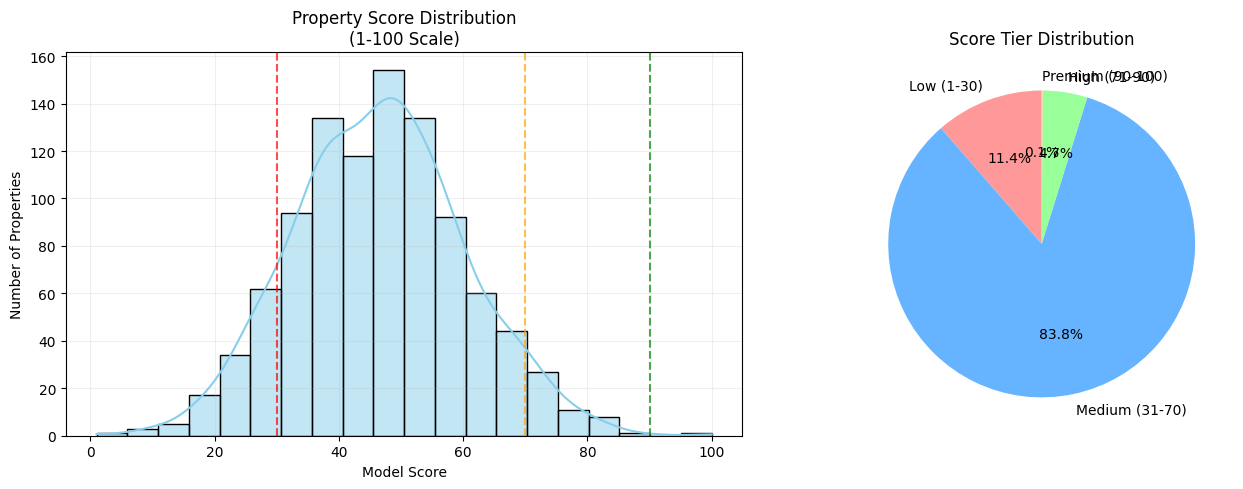

Score Range: 1.0-100.0
Mean Score: 46.5

Tier Counts:
Low (1-30)          114
Medium (31-70)      838
High (71-90)         47
Premium (90-100)      1
Name: count, dtype: int64


In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(14, 5))

# Generate sample scores if you don't have a model
np.random.seed(42)
scores = np.random.normal(0.5, 0.15, 1000)  # Sample scores between 0-1
scaled_scores = np.interp(scores, (scores.min(), scores.max()), (1, 100))

# 1. Histogram with Tier Thresholds
plt.subplot(1, 2, 1)
sns.histplot(scaled_scores, bins=20, kde=True, color='skyblue')

# Add tier thresholds
thresholds = [30, 70, 90]
colors = ['red', 'orange', 'green']
for t, c in zip(thresholds, colors):
    plt.axvline(t, color=c, linestyle='--', alpha=0.7)

plt.title('Property Score Distribution\n(1-100 Scale)')
plt.xlabel('Model Score')
plt.ylabel('Number of Properties')
plt.grid(alpha=0.2)

# 2. Tier Breakdown Pie Chart
plt.subplot(1, 2, 2)
tiers = pd.cut(scaled_scores,
               bins=[0, 30, 70, 90, 100],
               labels=['Low (1-30)', 'Medium (31-70)', 'High (71-90)', 'Premium (90-100)'])

tier_counts = tiers.value_counts()
plt.pie(tier_counts,
        labels=tier_counts.index,
        autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
        startangle=90)
plt.title('Score Tier Distribution')

plt.tight_layout()
plt.show()

# Print summary stats
print(f"Score Range: {scaled_scores.min():.1f}-{scaled_scores.max():.1f}")
print(f"Mean Score: {scaled_scores.mean():.1f}")
print("\nTier Counts:")
print(tier_counts)